# Human Resource Analytics

# Importing libraries

In [118]:
# Linear algebra
import pandas as pd 
#Data processing
import numpy as np 

#Data visualization
import matplotlib.pyplot as plt 
#Statistical plot
import seaborn as sns  

#Machine Learning
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


# Get the data

In [90]:
#Reading csv file
HrData1 = pd.read_csv('HR_comma_sep.csv')

In [91]:
#First few records
HrData1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Column sales seems to represent the department, lets rename it to dept for better reasoning further on

In [92]:
#Changing sales column name 
HrData1 = HrData1.rename(columns = {'sales': 'dept'})

In [93]:
#To check the dimension
HrData1.shape

(14999, 10)

There are 14999 data entries and 10 different features

In [94]:
#Detail information
HrData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


From the above information we see that there are two categorical data i.e. dept and salary and rest all are numeric data. We should also check for any missing values in the dataset and treat before proceeding with the analysis. In this case there are no missing values and hence we can proceed.

# EDA

In [95]:
#Statistical description of the data
HrData1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


This table describes the characteristics of each parameters. For eg. We can see that satisfaction level is equal to 62%, performance average is around 72%, people mostly work on 3 to 4 projects etc.

In [96]:
#How are the parameters related to each other
HrData1.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


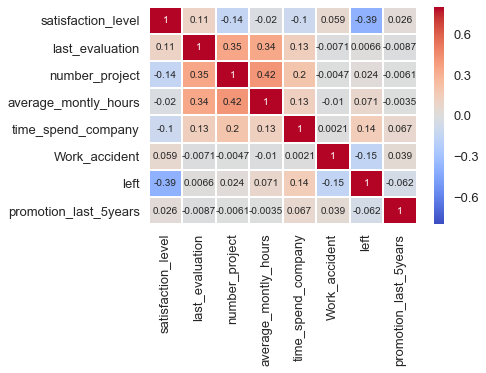

In [97]:
#Let's visualise the same
correlationMatrix = HrData1.corr()

sns.heatmap(correlationMatrix, annot=True, vmax = .8, cmap='coolwarm', linewidths=1)
plt.show()

Here the number represents the significance of the correlation while the color presents the direction i.e. positive or negative

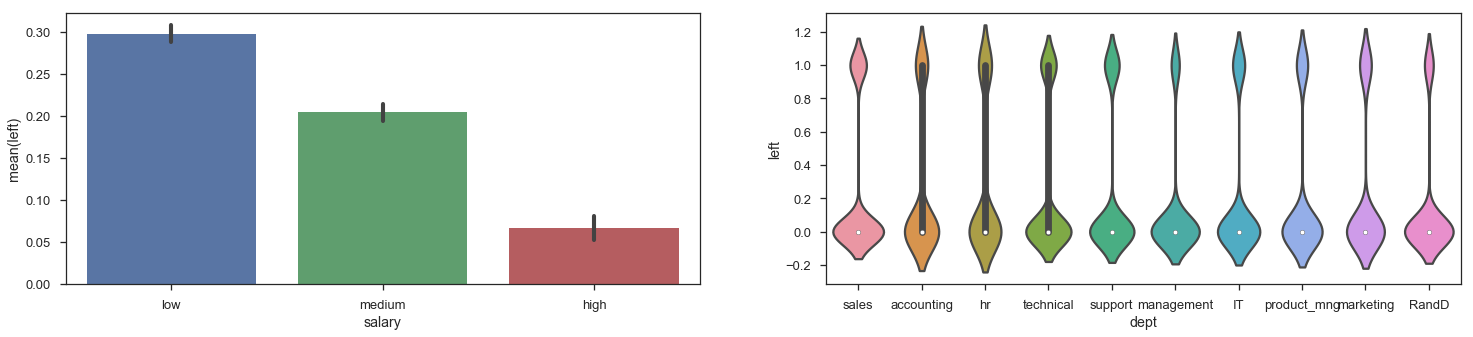

In [98]:
sns.set_style('ticks')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(25,5))
sns.barplot(x='salary', y='left', data=HrData1, ax=axis1)
sns.violinplot(x='dept', y='left', data=HrData1, ax=axis2)

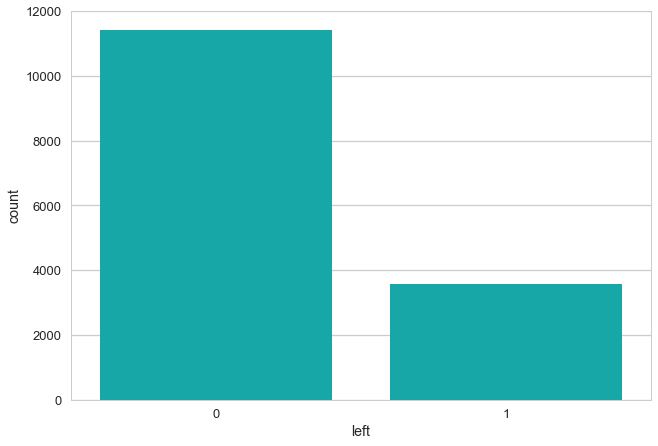

In [100]:
#Count Plot with color and style
sns.set_style('whitegrid')

sns.countplot(x='left', data=HrData1, color="c")
sns.set_context('talk')

This plot counts the number of employees who left the company and who didnt

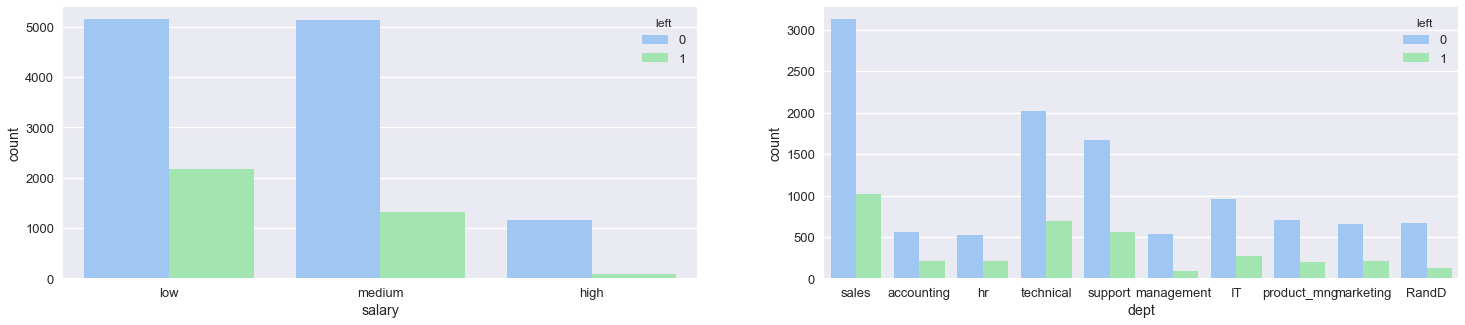

In [101]:
#Count plot to check the number of employees with respect to salary and department feature and grouping together with left feature
sns.set_style('darkgrid')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(25,5))
sns.countplot(x='salary', hue = 'left', data=HrData1, ax=axis1, palette="pastel")
sns.countplot(x='dept', hue = 'left', data=HrData1, ax=axis2, palette="pastel")
sns.set_context('talk')

# Categorical Features


Converting categorical data to numeric before building the model.

In [102]:
HrData1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [103]:
HrData1['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [104]:
#Convert dept string parameter to numeric values
HrData_dept = pd.get_dummies(HrData1['dept'])
HrData = HrData1.join(HrData_dept)
HrData.drop(["dept"], axis = 1, inplace=True)
HrData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [105]:
HrData_salary = pd.get_dummies(HrData['salary'])
HrData = HrData.join(HrData_salary)
HrData.drop(["salary"], axis = 1, inplace=True)
HrData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Train Test Split

Machine learning is a method of data analysis that automates analytical model building. In this process we divide our data into train and test dataset. Perform Model Selection on train data set and Model evaluation on test data set.

Splitting data into 80% train and 20% test.

Response variable: left

In [106]:
X = HrData.drop("left", axis=1)
y = HrData[['left']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [107]:
logModel = LogisticRegression()
logModel.fit(X_train,y_train)
pred_Lm = logModel.predict(X_test)
print(confusion_matrix(y_test,pred_Lm))
print('\n')
print(classification_report(y_test,pred_Lm))

[[2118  176]
 [ 474  232]]


             precision    recall  f1-score   support

          0       0.82      0.92      0.87      2294
          1       0.57      0.33      0.42       706

avg / total       0.76      0.78      0.76      3000



# Decision Tree

In [108]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_Dt = dtree.predict(X_test)
print(confusion_matrix(y_test,pred_Dt))
print('\n')
print(classification_report(y_test,pred_Dt))

[[2252   42]
 [  27  679]]


             precision    recall  f1-score   support

          0       0.99      0.98      0.98      2294
          1       0.94      0.96      0.95       706

avg / total       0.98      0.98      0.98      3000



# Random Forest

In [109]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[2286    8]
 [  27  679]]


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2294
          1       0.99      0.96      0.97       706

avg / total       0.99      0.99      0.99      3000



# Sector Vector Machines

In [110]:
model = SVC()
model.fit(X_train,y_train)
pred_svm = model.predict(X_test)
print(confusion_matrix(y_test,pred_svm))
print('\n')
print(classification_report(y_test,pred_svm))

[[2203   91]
 [  69  637]]


             precision    recall  f1-score   support

          0       0.97      0.96      0.96      2294
          1       0.88      0.90      0.89       706

avg / total       0.95      0.95      0.95      3000



In [111]:
# Random Forest had the highest accuracy for predicting if an employee was going to leave - 
# 0.99. Therefore, setting predictions model = random forests

predictions_model = rfc

Feature ranking:
1. satisfaction_level (0.307178)
2. number_project (0.186689)
3. time_spend_company (0.179725)
4. average_montly_hours (0.159025)
5. last_evaluation (0.117767)
6. Work_accident (0.010969)
7. low (0.007219)
8. high (0.005766)
9. sales (0.003594)
10. technical (0.003496)
11. medium (0.003378)
12. support (0.002461)
13. promotion_last_5years (0.001850)
14. accounting (0.001674)
15. IT (0.001671)
16. management (0.001667)
17. hr (0.001624)
18. RandD (0.001599)
19. marketing (0.001419)
20. product_mng (0.001227)


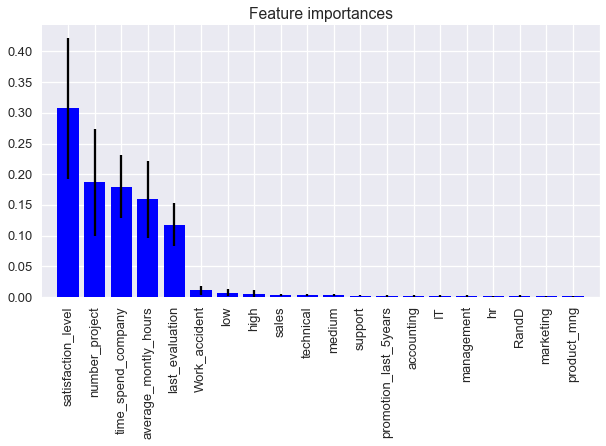

In [112]:
HrData_imp = HrData.drop("left", axis=1)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(HrData_imp.shape[1]):
    print("%d. %s (%f)" % (f + 1, HrData_imp.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(HrData_imp.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(HrData.shape[1]), HrData_imp.columns[indices], rotation='vertical')
plt.xlim([-1, HrData_imp.shape[1]])
plt.show()

# Principal Component Analysis

In [25]:
HrData1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
HrData_pca=HrData1.drop(labels=['dept','salary'],axis=1)
HrData_pca.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


Now we need to bring "left" column to the front as it is the label and not the feature.

In [27]:
cols = HrData_pca.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

Here we are converting columns of the dataframe to list so it would be easier for us to reshuffle the columns.We are going to use cols.insert method

In [28]:
cols.insert(0, cols.pop(cols.index('left')))
cols

['left',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [29]:
HrData_pca = HrData_pca.reindex(columns= cols)

By using df_drop.reindex(columns= cols) we are converting list to columns again

Now we are separating features of our dataframe from the labels.

In [30]:
X = HrData_pca.iloc[:,1:8].values
y = HrData_pca.iloc[:,0].values
X

array([[ 0.38,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.8 ,  0.86,  5.  , ...,  6.  ,  0.  ,  0.  ],
       [ 0.11,  0.88,  7.  , ...,  4.  ,  0.  ,  0.  ],
       ..., 
       [ 0.37,  0.53,  2.  , ...,  3.  ,  0.  ,  0.  ],
       [ 0.11,  0.96,  6.  , ...,  4.  ,  0.  ,  0.  ],
       [ 0.37,  0.52,  2.  , ...,  3.  ,  0.  ,  0.  ]])

In [31]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
np.shape(X)

(14999, 7)

Thus X is now matrix with 14999 rows and 7 columns

In [33]:
np.shape(y)

(14999,)

y is now matrix with 14999 rows and 1 column

# Data Standardisation

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [34]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Computing Eigenvectors and Eigenvalues:

Before computing Eigen vectors and values we need to calculate covariance matrix.

Covariance matrix

In [113]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


In [114]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728   0.05870115
   0.02560689]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476
  -0.00868435]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086
  -0.00606436]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356
  -0.00354465]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668  0.00212056
   0.06743742]
 [ 0.05870115 -0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668
   0.03924805]
 [ 0.02560689 -0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805
   1.00006668]]


# Eigen decomposition of the covariance matrix

In [115]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.08797699  0.29189921  0.27784886  0.33637135  0.79752505  0.26786864
  -0.09438973]
 [-0.50695734 -0.30996609 -0.70780994  0.07393548  0.33180877  0.1101505
  -0.13499526]
 [-0.5788351   0.77736008 -0.00657105 -0.19677589 -0.10338032 -0.10336241
  -0.02293518]
 [-0.54901653 -0.45787675  0.63497294 -0.25170987  0.10388959 -0.01034922
  -0.10714981]
 [-0.31354922 -0.05287224  0.12200054  0.78782241 -0.28404472  0.04036861
   0.42547869]
 [ 0.01930249 -0.04433104 -0.03622859 -0.05762997  0.37489883 -0.8048393
   0.45245222]
 [-0.00996933 -0.00391698 -0.04873036 -0.39411153  0.10557298  0.50589173
   0.75836313]]

Eigenvalues 
[ 1.83017431  0.54823098  0.63363587  0.84548166  1.12659606  0.95598647
  1.06036136]


# PCA in scikit-learn

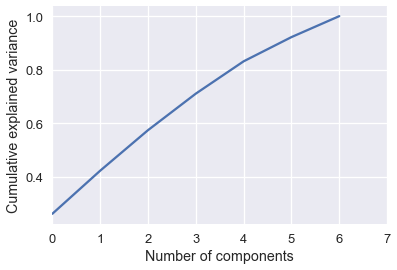

In [52]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 6 components. Therfore we can drop 7th component.

In [49]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [50]:
print(Y_sklearn)

[[-1.90035018 -1.12083103 -0.0797787   0.03228437 -0.07256447  0.06063013]
 [ 2.1358322   0.2493369   0.0936161   0.50676925  1.2487747  -0.61378158]
 [ 3.05891625 -1.68312693 -0.301682   -0.4488635  -1.12495888  0.29066929]
 ..., 
 [-2.0507165  -1.182032   -0.04594506  0.02441143 -0.01553247  0.24980658]
 [ 2.91418496 -1.42752606 -0.36333357 -0.31517759 -0.97107375  0.51444624]
 [-1.91543672 -1.17021407 -0.07024077  0.01486762 -0.09545357  0.01773844]]


In [51]:
Y_sklearn.shape

(14999, 6)

Thus Principal Component Analysis is used to remove the redundant features from the datasets without losing much information.These features are low dimensional in nature.The first component has the highest variance followed by second, third and so on.PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.

In [88]:
Y_sklearn

array([[-1.90035018, -1.12083103, -0.0797787 ,  0.03228437, -0.07256447,
         0.06063013],
       [ 2.1358322 ,  0.2493369 ,  0.0936161 ,  0.50676925,  1.2487747 ,
        -0.61378158],
       [ 3.05891625, -1.68312693, -0.301682  , -0.4488635 , -1.12495888,
         0.29066929],
       ..., 
       [-2.0507165 , -1.182032  , -0.04594506,  0.02441143, -0.01553247,
         0.24980658],
       [ 2.91418496, -1.42752606, -0.36333357, -0.31517759, -0.97107375,
         0.51444624],
       [-1.91543672, -1.17021407, -0.07024077,  0.01486762, -0.09545357,
         0.01773844]])

# Split PCA dataset

In [116]:
X_pca = Y_sklearn
y_pca = y
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Random Forest-PCA 

In [117]:
rfc_pca1 = RandomForestClassifier(n_estimators=100)
rfc_pca1.fit(X_train1, y_train1)
rfc_pred1 = rfc_pca.predict(X_test1)
print(confusion_matrix(y_test1,rfc_pred1))
print('\n')
print(classification_report(y_test1,rfc_pred1))

[[2281   13]
 [  32  674]]


             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2294
          1       0.98      0.95      0.97       706

avg / total       0.98      0.98      0.98      3000

